In [3]:
import os
import csv
import pandas as pd
import numpy as np
from IPython.display import clear_output
import ast
import pymongo as pm
from datetime import datetime


In [4]:
# set vars 
auth = pd.read_csv('auth.txt', header = None) # this auth.txt file contains the password for the stanford-cogsci.org user
pswd = auth.values[0][0]
conn = pm.MongoClient('mongodb://stanford:' + pswd + '@127.0.0.1')
db = conn['kiddraw']
coll = db['invalid_draw']

In [5]:
time_threshold = datetime(2020, 8, 13, 10, 15) # when we started running mturk exp
actual_workers = coll.find({'date':{'$gt': time_threshold}}).distinct('worker_id')

In [6]:
our_worker_ids = {'A1MMCS8S8CTWKU'}

In [7]:
for w in actual_workers:
    print w
    entries = coll.find({'worker_id': w})
    bad_drawings = entries.count()
    print bad_drawings

A275HKY8EPXRBI
66
A1MMCS8S8CTWKU
39
A9KV8Q3VJY3Q5
91
A1M682B2WUSYJP
49
A4EDGOM5A2LP
130
AQJWO4YPR3LUQ
6
A122YYPAT26PAY
436
A2BE4JNIIIC2XD
165
A3FSXLBGUG0XUB
126
A9PGIK1LRH35F
172
AJFO6Q9JBD48Q
85
A2FGKKWP33DFWS
56
A19LEGPNW93L9Z
91
A1QJ11VRFUK6L9
230
A3908297ZI3LES
87
A2E0LU8V4EUX5C
54
A2837NCV9OXBFZ
64
A1PL4QW6IPULOX
78


In [10]:
entries[0]

{u'__v': 0,
 u'_id': ObjectId('5f3c2e61e14b1e363bd0e163'),
 u'age': u'age2',
 u'class': u'this square',
 u'date': datetime.datetime(2020, 8, 18, 19, 39, 3, 539000),
 u'filename': u'this square_sketch_age2_cdm_run_v51558030152230.png',
 u'session_id': u'cdm_run_v51558030152230',
 u'worker_id': u'A1PL4QW6IPULOX'}

In [46]:
coll = db['check_invalid_v5_dev']

In [17]:
test = coll.find({'filename': 'this square_sketch_age2_cdm_run_v51558030152230.png'})
test[0]

{u'_id': ObjectId('5e6a7f041943e62410f20708'),
 u'age': u'age2',
 u'class': u'this square',
 u'filename': u'this square_sketch_age2_cdm_run_v51558030152230.png',
 u'games': [u'abc'],
 u'session_id': u'cdm_run_v51558030152230',
 u'shuffler_ind': 8063,
 u'updatedAt': datetime.datetime(2020, 8, 18, 19, 38, 55, 691000),
 u'url': u'https://kiddraw.s3.amazonaws.com/this square_sketch_age2_cdm_run_v51558030152230.png'}

In [26]:
things = coll.find({'class':{'$exists':True}})
df = pd.DataFrame(things)

In [32]:
df = df.assign(numGames = df.apply(lambda x: len(x['games']), axis=1))

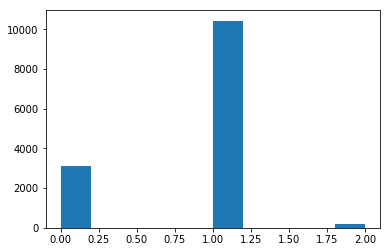

In [36]:
from matplotlib import pyplot
%matplotlib inline
plt = pyplot
h = plt.hist(df['numGames'].values)

In [37]:
df.sort_values(by='shuffler_ind', inplace=True)

In [38]:
print(df['shuffler_ind'].values)

[    0     1     2 ..., 13753 13754 13755]


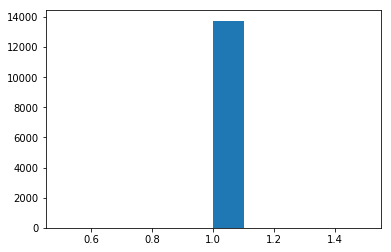

In [41]:
from collections import Counter
h = plt.hist(Counter(df['shuffler_ind'].values).values())#

In [45]:
## is it really the case that the number of unique shuffler_inds matches the size of the df???
assert np.max(df['shuffler_ind'].values)==len(df)-1


In [75]:
time_threshold = datetime(2020, 8, 19, 10, 15) # when we started running mturk exp
coll_recent = coll.find({'updatedAt':{'$gt': time_threshold}})

In [76]:
coll_recent[0]

{u'_id': ObjectId('5e6a7e4f1943e62410f1e244'),
 u'age': u'age3',
 u'class': u'a camel',
 u'filename': u'a camel_sketch_age3_cdm_run_v51551379846475.png',
 u'games': [u'A275HKY8EPXRBI'],
 u'session_id': u'cdm_run_v51551379846475',
 u'shuffler_ind': 13298,
 u'updatedAt': datetime.datetime(2020, 8, 20, 18, 9, 7, 289000),
 u'url': u'https://kiddraw.s3.amazonaws.com/a camel_sketch_age3_cdm_run_v51551379846475.png'}

In [ ]:
## wipe games in current collection